In [1]:
import os
import numpy as np
import math
import matplotlib.pyplot as plt

import scipy as sp
import scipy.linalg
import scipy.optimize
# from scipy import optimize

import glob

# # import lsqfit
# from lib import Jackknife
# from lib import simple_mean
# from lib import format_print

# plt.rcParams['figure.dpi'] = 300

In [2]:
class Jackknife:
    def __init__( self, len_data, binsize ):
        self.binsize = binsize
        self.nbins = math.floor( len_data/self.binsize )
        self.N = self.binsize * self.nbins
        self.jack_avg = []
        self.est = 0
        self.var_est = 0

    def set( self, func, list_of_data ):
        for i in range( self.nbins ):
            self.jack_avg.append( func( i, self.binsize, list_of_data ) )

    def do_it( self ):
        for i in range( 0, self.nbins ):
            self.est += self.jack_avg[i]
        self.est /= self.nbins

        for i in range( 0, self.nbins ):
            self.var_est += ( self.jack_avg[i] - self.est )**2
        self.var_est /= self.nbins
        self.var_est *= self.nbins -1

    def mean( self ):
        return self.est

    def var( self ):
        return self.var_est

    def err( self ):
        return np.sqrt(self.var_est)

def simple_mean(i, binsize, np_data):
    resmpld = np.delete(np_data, np.s_[i*binsize:(i+1)*binsize], axis=0)
    return np.mean(resmpld, axis=0)

def format_print(cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'

def format_print_w_exact(exact, cen, err):
    for i in range(-50, 50):
        if 10**(-i+1)>=err>10**(-i):
            tmp=err*10**(i+1)
            return '{num:.{width}f}'.format(num=cen, width=i+1)+'('+str(round(tmp))+')'+': '+'{num:.{width}f}'.format(num=(exact-cen)/err, width=i+1)+' sigma'

In [3]:
res_list=[]

binsize=10

In [4]:
path="./beta50.000000at0.138394nt32L1_v2/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [5]:
path="./beta50.000000at0.069197nt32L1_v2/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [6]:
path="./beta50.000000at0.036934nt32L2_v2/"
files_ = sorted(glob.glob(path+"plaq_ss_t_*.dat"), key=len)
files = np.array(files_)

data_=[]
for file in files:
    data_.append( np.loadtxt( file ) )
data = np.array( data_ )

Nt=data.shape[1]

jk = Jackknife( data.shape[0], binsize )
jk.set( simple_mean, data )
jk.do_it()

res_list.append( [path, jk.mean(), jk.err()] )

In [7]:
res_list

[['./beta50.000000at0.138394nt32L1_v2/',
  array([0.05378207, 0.03163215, 0.0189523 , 0.01149634, 0.00708858,
         0.00448384, 0.00284665, 0.00177947, 0.00118273, 0.00081948,
         0.00053707, 0.00034221, 0.00030449, 0.00026111, 0.00019233,
         0.00019217, 0.00022491, 0.00019217, 0.00019233, 0.00026111,
         0.00030449, 0.00034221, 0.00053707, 0.00081948, 0.00118273,
         0.00177947, 0.00284665, 0.00448384, 0.00708858, 0.01149634,
         0.0189523 , 0.03163215]),
  array([5.21833502e-05, 4.74696688e-05, 4.24059908e-05, 3.93463202e-05,
         3.80315951e-05, 3.66643497e-05, 3.50076707e-05, 3.55485093e-05,
         3.59880843e-05, 3.66644322e-05, 3.60388806e-05, 3.70653828e-05,
         3.84997536e-05, 3.98424565e-05, 4.31942074e-05, 4.88073469e-05,
         5.25850352e-05, 4.88073469e-05, 4.31942074e-05, 3.98424565e-05,
         3.84997536e-05, 3.70653828e-05, 3.60388806e-05, 3.66644322e-05,
         3.59880843e-05, 3.55485093e-05, 3.50076707e-05, 3.66643497e-05,

In [14]:
def f(t, nmax):
    res = 0.0
    for n in range(1,nmax):
        res += np.sqrt( n*(n+1.0) ) * (2.0*n+1.0) * np.exp( -np.sqrt( n*(n+1.0) )*t )
    return res

In [22]:
Nt

32

(1e-05, 1.0)

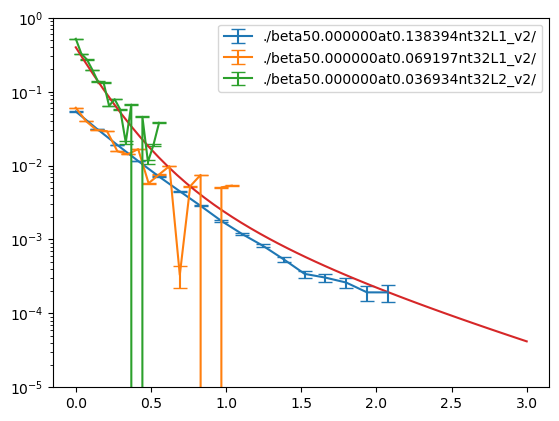

In [26]:
plt.yscale("log")

for res in res_list:
    Nt = res[1].shape[0]

    at = float(res[0].split("at")[1].split("nt")[0])
    xx=np.arange(int(Nt/2)) * at
    # xx=np.arange(Nt)
    yy=res[1][:int(Nt/2)]
    dy=res[2][:int(Nt/2)]

    plt.errorbar( xx, yy, dy, capsize=5, label=res[0] )

# xx=np.arange(Nt)
# yy= 0.07*np.exp( -np.sqrt(2.0) * xx / 8.0 )
# plt.plot( xx, yy )

xx=np.linspace(0,3.0,50)
# yy= 0.02*np.exp( -np.sqrt(2.0) * xx * 2.4 )
yy= 0.0006*f(xx, 10)
plt.plot( xx, yy )



plt.legend()
plt.ylim( 1.0e-5, 1.0e0 )

In [9]:
50.0/8.0

6.25